In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import distinct
from sqlalchemy import desc

In [5]:
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
session.query(Measurement.prcp).group_by(Measurement.prcp).all()

[(None),
 (0.0),
 (0.01),
 (0.02),
 (0.03),
 (0.04),
 (0.05),
 (0.06),
 (0.07),
 (0.08),
 (0.09),
 (0.1),
 (0.11),
 (0.12),
 (0.13),
 (0.14),
 (0.15),
 (0.16),
 (0.17),
 (0.18),
 (0.19),
 (0.2),
 (0.21),
 (0.22),
 (0.23),
 (0.24),
 (0.25),
 (0.26),
 (0.27),
 (0.28),
 (0.29),
 (0.3),
 (0.31),
 (0.32),
 (0.33),
 (0.34),
 (0.35),
 (0.36),
 (0.37),
 (0.38),
 (0.39),
 (0.4),
 (0.41),
 (0.42),
 (0.43),
 (0.44),
 (0.45),
 (0.46),
 (0.47),
 (0.48),
 (0.49),
 (0.5),
 (0.51),
 (0.52),
 (0.53),
 (0.54),
 (0.55),
 (0.56),
 (0.57),
 (0.58),
 (0.59),
 (0.6),
 (0.61),
 (0.62),
 (0.63),
 (0.64),
 (0.65),
 (0.66),
 (0.67),
 (0.68),
 (0.69),
 (0.7),
 (0.71),
 (0.72),
 (0.73),
 (0.74),
 (0.75),
 (0.76),
 (0.77),
 (0.78),
 (0.79),
 (0.8),
 (0.81),
 (0.82),
 (0.83),
 (0.84),
 (0.85),
 (0.86),
 (0.87),
 (0.88),
 (0.89),
 (0.9),
 (0.91),
 (0.92),
 (0.93),
 (0.94),
 (0.95),
 (0.96),
 (0.97),
 (0.98),
 (0.99),
 (1.0),
 (1.01),
 (1.02),
 (1.03),
 (1.04),
 (1.05),
 (1.06),
 (1.07),
 (1.08),
 (1.09),
 (1.1),
 (1.

In [11]:
#Precipitation Analysis
start_date=date(2017,8,23)
#year_ago=dt.date.today() - dt.timedelta(days=365)
year_ago= start_date - dt.timedelta(days=365)

query = session.query(Measurement.date, func.sum(Measurement.prcp).label('Precipitation')).\
        filter(Measurement.date >= year_ago).\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()
        

query

query_df = pd.DataFrame (query)
query_df.head()

,date,Precipitation
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32


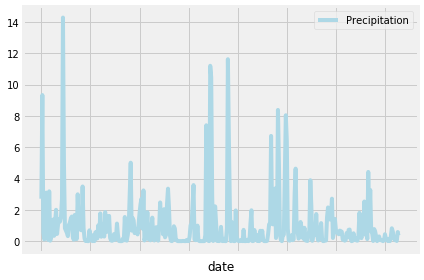

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today
# Perform a query to retrieve the data and precipitation scores

# Sort the dataframe by date
query_df.sort_values('date')
query_df

# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
color = ["lightblue"]
#query_df.plot(kind='bar',x='date',y='Precipitation',color=color)
query_df.plot(x_compat=True, x='date',color=color)
plt.xticks(rotation='45')
plt.tight_layout()
plt.savefig('station_precipitation.png')
plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
query_df.describe()

,Precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


In [14]:
#Station Analysis
# How many stations are available in this dataset? #9
session.query(func.count(distinct(Measurement.station))).all()


[(9)]

In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.

stations = session.query(Measurement.station, func.sum(Measurement.tobs)).\
            group_by(Measurement.station).\
            order_by(desc(func.sum(Measurement.tobs))).all()
stations   

[('USC00519397', 203083.0),
 ('USC00519523', 198957.0),
 ('USC00519281', 198652.0),
 ('USC00513117', 196915.0),
 ('USC00516128', 185230.0),
 ('USC00514830', 164871.0),
 ('USC00511918', 141728.0),
 ('USC00517948', 102467.0),
 ('USC00518838', 37162.0)]

In [16]:
#Which stations has the highest number of observations?
session.query(Measurement.station,func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
stations_min = session.query(Measurement.station,func.min(Measurement.tobs)).all()
stations_min                

[('USC00511918', 53.0)]

In [18]:
stations_max = session.query(Measurement.station,func.max(Measurement.tobs)).all()
stations_max

[('USC00519397', 87.0)]

In [19]:
stations_avg = session.query(Measurement.station,func.avg(Measurement.tobs)).all()
stations_avg

[('USC00516128', 73.09795396419437)]

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

start_date=date(2017,8,23)
#year_ago=dt.date.today() - dt.timedelta(days=365)
year_ago= start_date - dt.timedelta(days=365)

query2 = session.query(Measurement.station, Measurement.tobs).\
        filter(Measurement.date >= year_ago).\
        filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all() 
query2
                         
# Save the query results as a Pandas DataFrame and set the index to the date column
query2_df = pd.DataFrame(query2)
query2_df

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
5,USC00519281,73.0
6,USC00519281,78.0
7,USC00519281,77.0
8,USC00519281,78.0
9,USC00519281,80.0


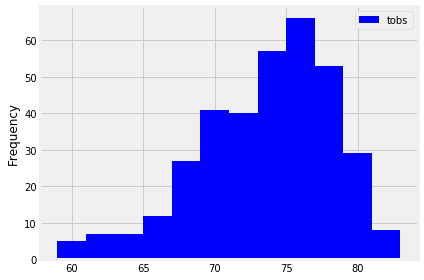

In [21]:
query2_df.plot.hist(bins=12, color = 'blue')
plt.tight_layout()
plt.savefig('station-histogram.png')
plt.show()